In [89]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Datadir = '/Users/mukund/Documents/GitHub/Cat_Dog_Classifier_CNN/Dataset/PetImages' #MAC
Datadir = 'C:/Users/mukun/Documents/GitHub/Cat_Dog_Classifier_CNN/Dataset/PetImages'
Categories = os.listdir(Datadir)
img_size = 150
training_data = []


def create_training_data():
    for category in Categories:
        path = os.path.join(Datadir,category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()
print(len(training_data))

24946


In [90]:
import random
random.shuffle(training_data)

X = []
y = []

for features, labels in training_data:
    X.append(features)
    y.append(labels)
    

X = np.array(X).reshape(-1, img_size,img_size, 1) # -1 so that it takes all the features and the last 1 because we are dealing with a gray scale data therefore we have 1 diemnsion, unlike rgb data which would have 3 dimension
X = X/255.0
y = np.array(y)

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(64,(3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = (2,2)))


#Need to add flatten as Conv2d takes 2d arguement, but dense layer takes 1d
model.add(Flatten())
model.add(Dense(128))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

model.fit(X,y, batch_size = 32, epochs = 5, validation_split=0.1)

Epoch 1/5
702/702 [==============================] - 365s 518ms/step - loss: 0.6879 - accuracy: 0.5753 - val_loss: 0.6596 - val_accuracy: 0.6200
Epoch 2/5
702/702 [==============================] - 374s 533ms/step - loss: 0.5836 - accuracy: 0.6944 - val_loss: 0.5480 - val_accuracy: 0.7222
Epoch 3/5
702/702 [==============================] - 356s 507ms/step - loss: 0.4707 - accuracy: 0.7762 - val_loss: 0.4836 - val_accuracy: 0.7651
Epoch 4/5
702/702 [==============================] - 350s 499ms/step - loss: 0.4087 - accuracy: 0.8125 - val_loss: 0.4471 - val_accuracy: 0.7916
Epoch 5/5
702/702 [==============================] - 350s 499ms/step - loss: 0.3575 - accuracy: 0.8429 - val_loss: 0.4260 - val_accuracy: 0.8108


Loading Sample images from google to test the model

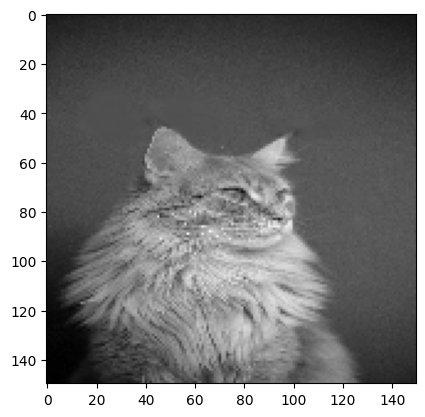

In [115]:
Testing_dir = 'C:/Users/mukun/Documents/GitHub/Cat_Dog_Classifier_CNN/Sample-Prediciton-Images'
testing_data = []
for img in os.listdir(Testing_dir):
    testing_img_array = cv2.imread(os.path.join(Testing_dir,img), cv2.IMREAD_GRAYSCALE)
    new_testing_array = cv2.resize(testing_img_array, (img_size,img_size))
    testing_data.append(new_testing_array)
plt.imshow(new_testing_array, cmap="gray")
plt.show()
#NORMALIZING THE TESTING DATA
validating_data = training_data
testing_data = np.array(testing_data).reshape(-1, img_size,img_size, 1)
testing_data = testing_data / 255.0

1/1 [==============================] - 0s 163ms/step


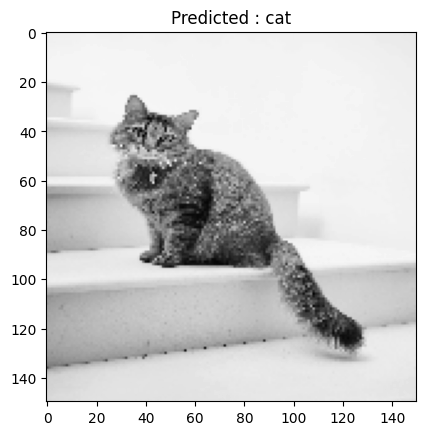

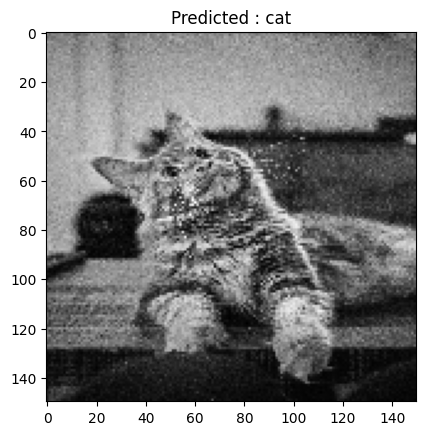

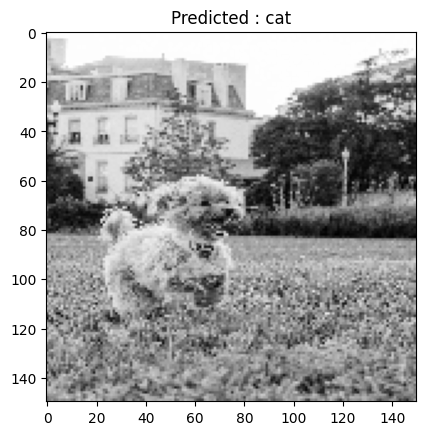

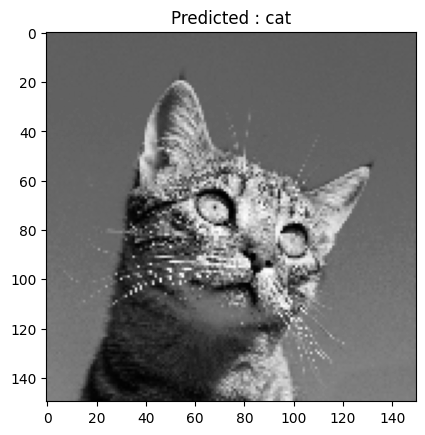

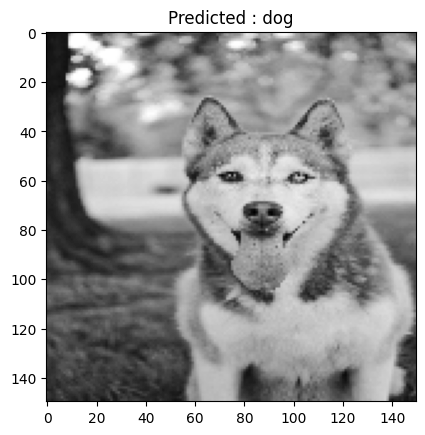

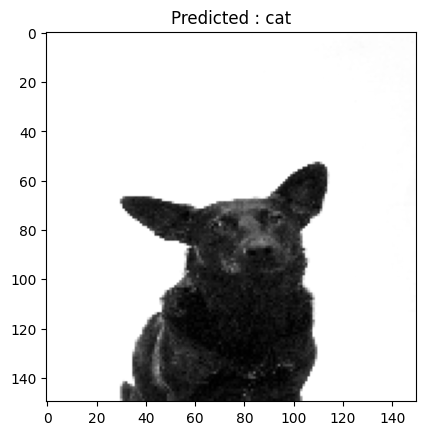

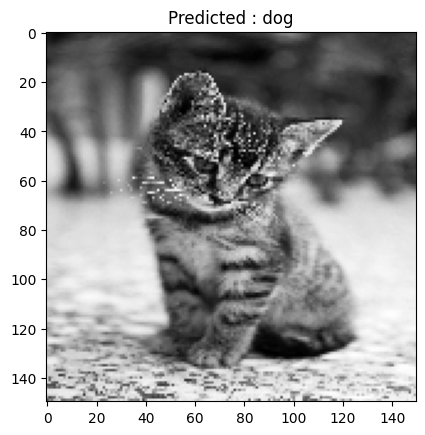

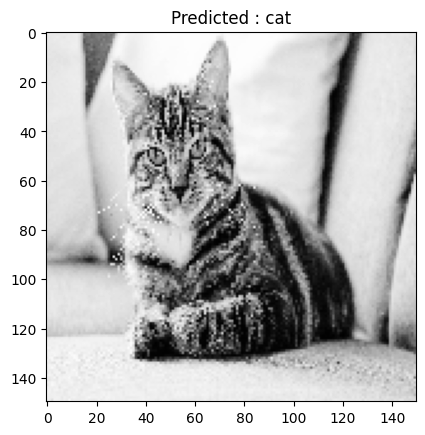

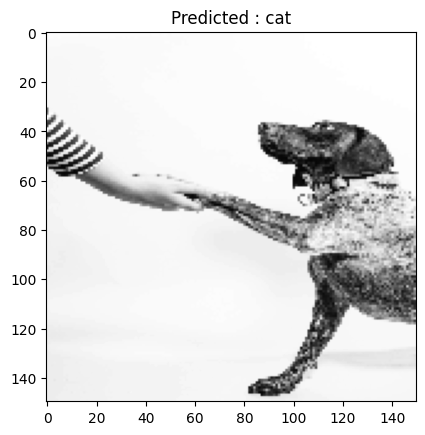

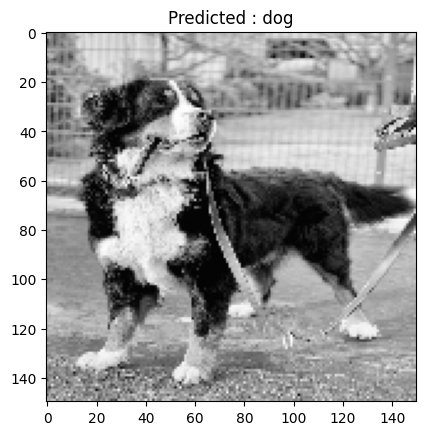

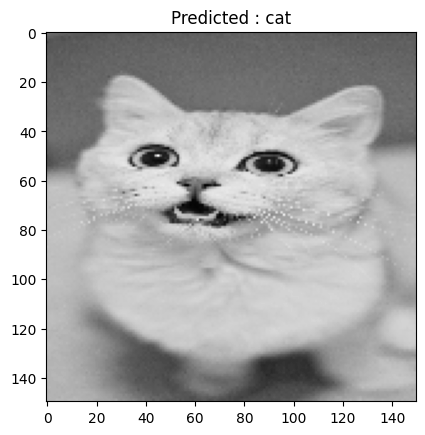

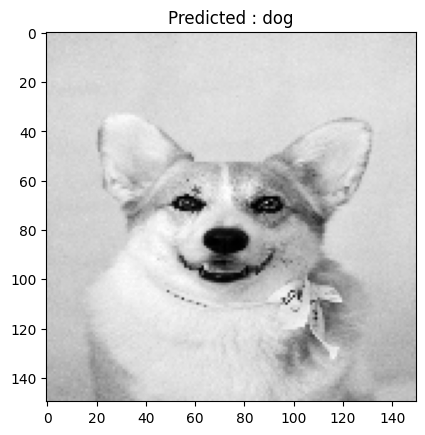

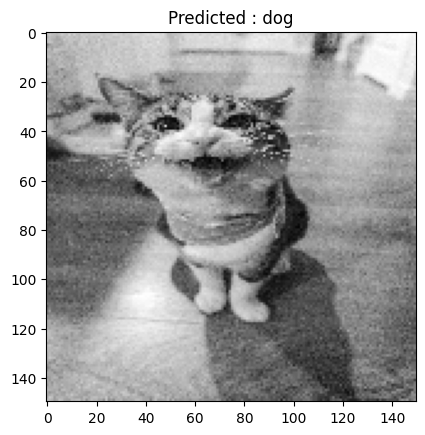

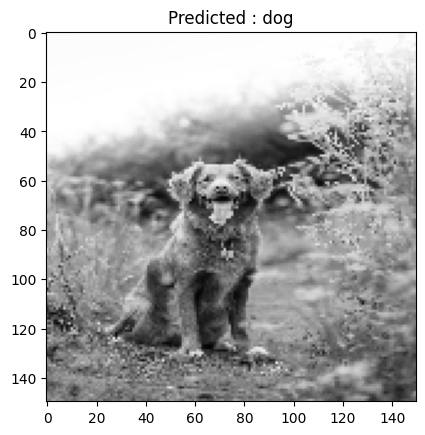

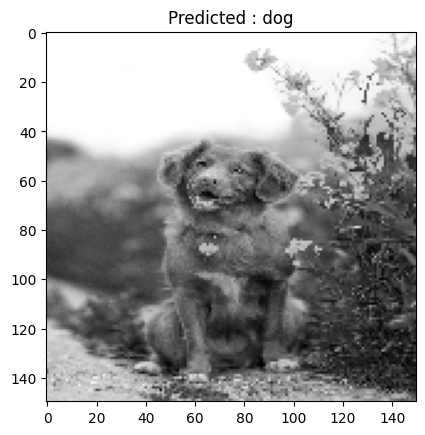

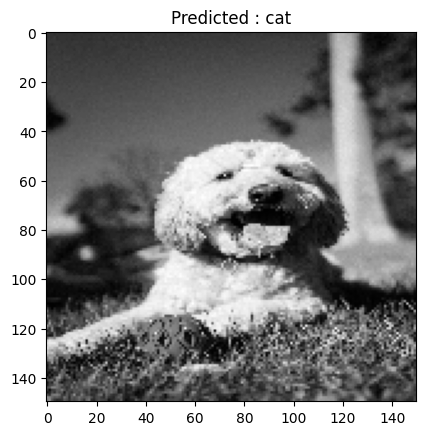

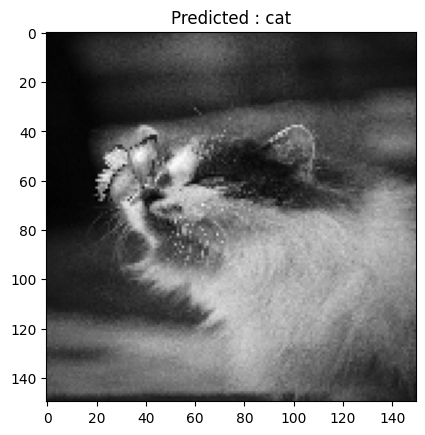

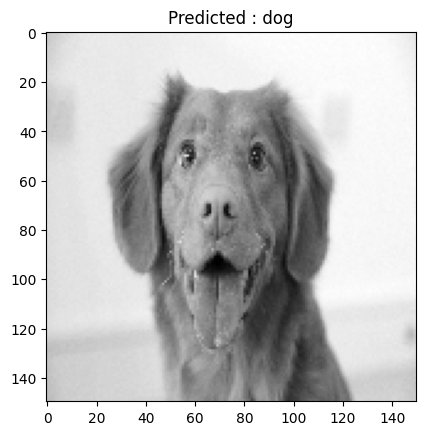

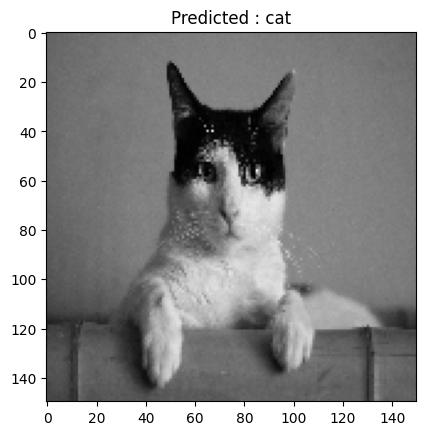

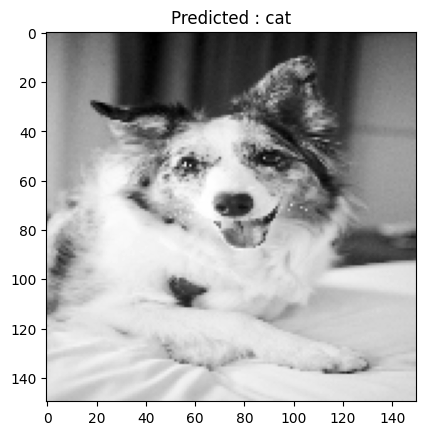

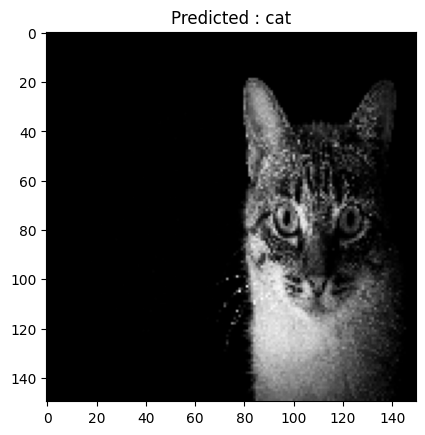

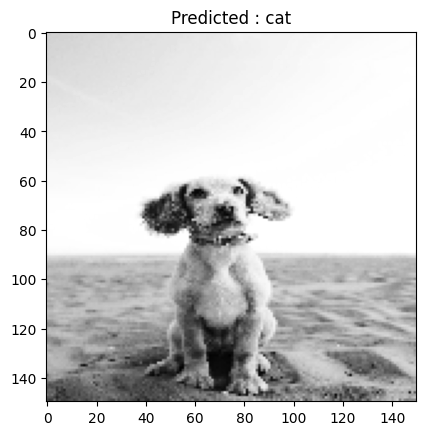

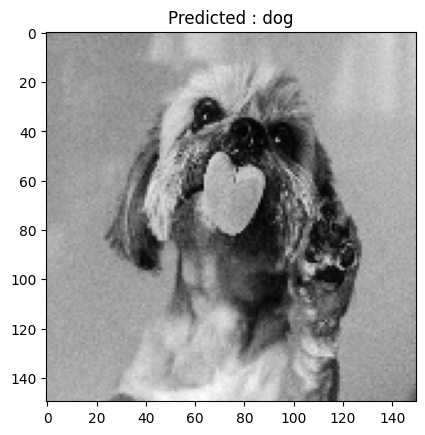

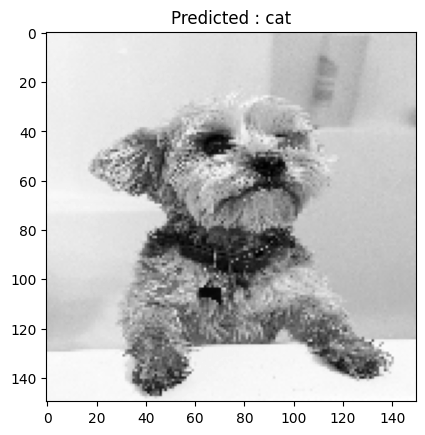

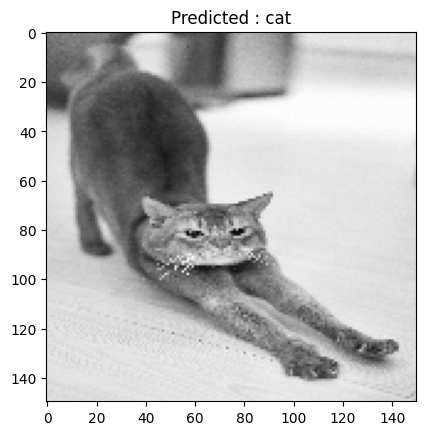

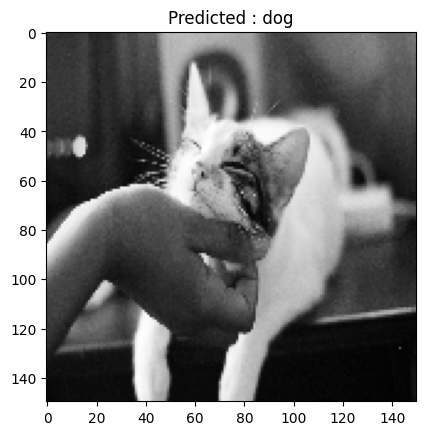

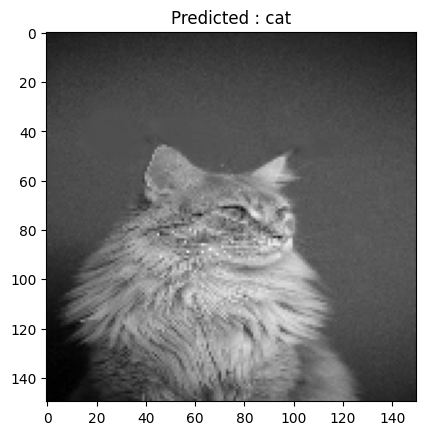

In [116]:
predictions = model.predict(testing_data)
threshold = 0.5
classifications = ['dog' if pred >= threshold else 'cat' for pred in predictions]

# Print the results
Testing_dir = 'C:/Users/mukun/Documents/GitHub/Cat_Dog_Classifier_CNN/Sample-Prediciton-Images'
testing_data = []
images = os.listdir(Testing_dir)
for img, clasf in zip(images,classifications):
    testing_img_array = cv2.imread(os.path.join(Testing_dir,img), cv2.IMREAD_GRAYSCALE)
    new_testing_array = cv2.resize(testing_img_array, (img_size,img_size))
    plt.imshow(new_testing_array, cmap="gray")
    plt.title(f"Predicted : {clasf}")
    plt.show()